In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

2025-06-29 13:25:27.688761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751183727.722680   24183 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751183727.731088   24183 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751183727.766091   24183 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751183727.766128   24183 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751183727.766132   24183 computation_placer.cc:177] computation placer alr

In [3]:
df = pd.read_csv(r'/mnt/c/Users/gotha/Downloads/archive (6)/stocks/WYNN.csv', encoding = 'unicode_escape')
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df['SMA_20'] = df['Adj Close'].rolling(window = 20).mean()
df['EMA_20'] = df['Adj Close'].ewm(span = 20, adjust = False).mean()

ema_12 = df['Adj Close'].ewm(span = 12, adjust = False).mean()
ema_26 = df['Adj Close'].ewm(span = 26, adjust = False).mean()
df['MACD'] = ema_26 - ema_12
df['MACD_Signal'] = df['MACD'].ewm(span = 9, adjust = False).mean()

df['Volatility_10'] = df['Adj Close'].rolling(window = 10).std()

df['Return'] = df['Adj Close'].pct_change()

In [6]:
df.dropna(inplace = True)
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)
df

Date       Open       High        Low      Close  Adj Close  \
0    2002-11-21  12.540000  12.850000  12.540000  12.850000   7.091079   
1    2002-11-22  12.850000  12.860000  12.500000  12.650000   6.980711   
2    2002-11-25  12.800000  13.000000  12.660000  12.930000   7.135226   
3    2002-11-26  12.940000  12.940000  12.740000  12.740000   7.030375   
4    2002-11-27  12.900000  12.900000  12.500000  12.500000   6.897937   
...         ...        ...        ...        ...        ...        ...   
4364 2020-03-26  77.379997  83.870003  69.760002  71.510002  71.510002   
4365 2020-03-27  66.650002  67.300003  63.259998  63.310001  63.310001   
4366 2020-03-30  61.759998  63.689999  58.049999  61.099998  61.099998   
4367 2020-03-31  60.709999  63.490002  59.099998  60.189999  60.189999   
4368 2020-04-01  56.910000  57.000000  52.910000  54.000000  54.000000   

        Volume  Month  Year     SMA_20     EMA_20       MACD  MACD_Signal  \
0        91300     11  2002   6.890763   6.869165   0.093175     0.116765   
1        55300     11  2002   6.880830   6.879788   0.072991     0.108010   
2       111000     11  2002   6.878623   6.904116   0.044019     0.095212   
3        59300     11  2002   6.881382   6.916141   0.029183     0.082006   
4        94300     11  2002   6.881382   6.914407   0.027792     0.071163   
...        ...    ...   ...        ...        ...        ...          ...   
4364  10883600      3  2020  76.429500  76.415450  14.197422    16.154728   
4365   9510200      3  2020  74.196000  75.167312  13.531361    15.630055   
4366   7156100      3  2020  71.854000  73.827568  13.031611    15.110366   
4367   5341600      3  2020  69.741500  72.528752  12.564153    14.601123   
4368   6239500      4  2020  67.158500  70.764109  12.548519    14.190602   

      Volatility_10    Return  
0          0.381604  0.035455  
1          0.364694 -0.015564  
2          0.378693  0.022135  
3          0.390969 -0.014695  
4          0.327691 -0.018838  
...             ...       ...  
4364      11.317923 -0.047295  
4365      10.474702 -0.114669  
4366      10.418349 -0.034908  
4367      10.286681 -0.014894  
4368       8.786602 -0.102841  

[4369 rows x 15 columns]

In [11]:
df_reg = df.copy()
df_reg

Date       Open       High        Low      Close  Adj Close  \
0    2002-11-21  12.540000  12.850000  12.540000  12.850000   7.091079   
1    2002-11-22  12.850000  12.860000  12.500000  12.650000   6.980711   
2    2002-11-25  12.800000  13.000000  12.660000  12.930000   7.135226   
3    2002-11-26  12.940000  12.940000  12.740000  12.740000   7.030375   
4    2002-11-27  12.900000  12.900000  12.500000  12.500000   6.897937   
...         ...        ...        ...        ...        ...        ...   
4364 2020-03-26  77.379997  83.870003  69.760002  71.510002  71.510002   
4365 2020-03-27  66.650002  67.300003  63.259998  63.310001  63.310001   
4366 2020-03-30  61.759998  63.689999  58.049999  61.099998  61.099998   
4367 2020-03-31  60.709999  63.490002  59.099998  60.189999  60.189999   
4368 2020-04-01  56.910000  57.000000  52.910000  54.000000  54.000000   

        Volume  Month  Year     SMA_20     EMA_20       MACD  MACD_Signal  \
0        91300     11  2002   6.890763   6.869165   0.093175     0.116765   
1        55300     11  2002   6.880830   6.879788   0.072991     0.108010   
2       111000     11  2002   6.878623   6.904116   0.044019     0.095212   
3        59300     11  2002   6.881382   6.916141   0.029183     0.082006   
4        94300     11  2002   6.881382   6.914407   0.027792     0.071163   
...        ...    ...   ...        ...        ...        ...          ...   
4364  10883600      3  2020  76.429500  76.415450  14.197422    16.154728   
4365   9510200      3  2020  74.196000  75.167312  13.531361    15.630055   
4366   7156100      3  2020  71.854000  73.827568  13.031611    15.110366   
4367   5341600      3  2020  69.741500  72.528752  12.564153    14.601123   
4368   6239500      4  2020  67.158500  70.764109  12.548519    14.190602   

      Volatility_10    Return  
0          0.381604  0.035455  
1          0.364694 -0.015564  
2          0.378693  0.022135  
3          0.390969 -0.014695  
4          0.327691 -0.018838  
...             ...       ...  
4364      11.317923 -0.047295  
4365      10.474702 -0.114669  
4366      10.418349 -0.034908  
4367      10.286681 -0.014894  
4368       8.786602 -0.102841  

[4369 rows x 15 columns]

<Axes: >

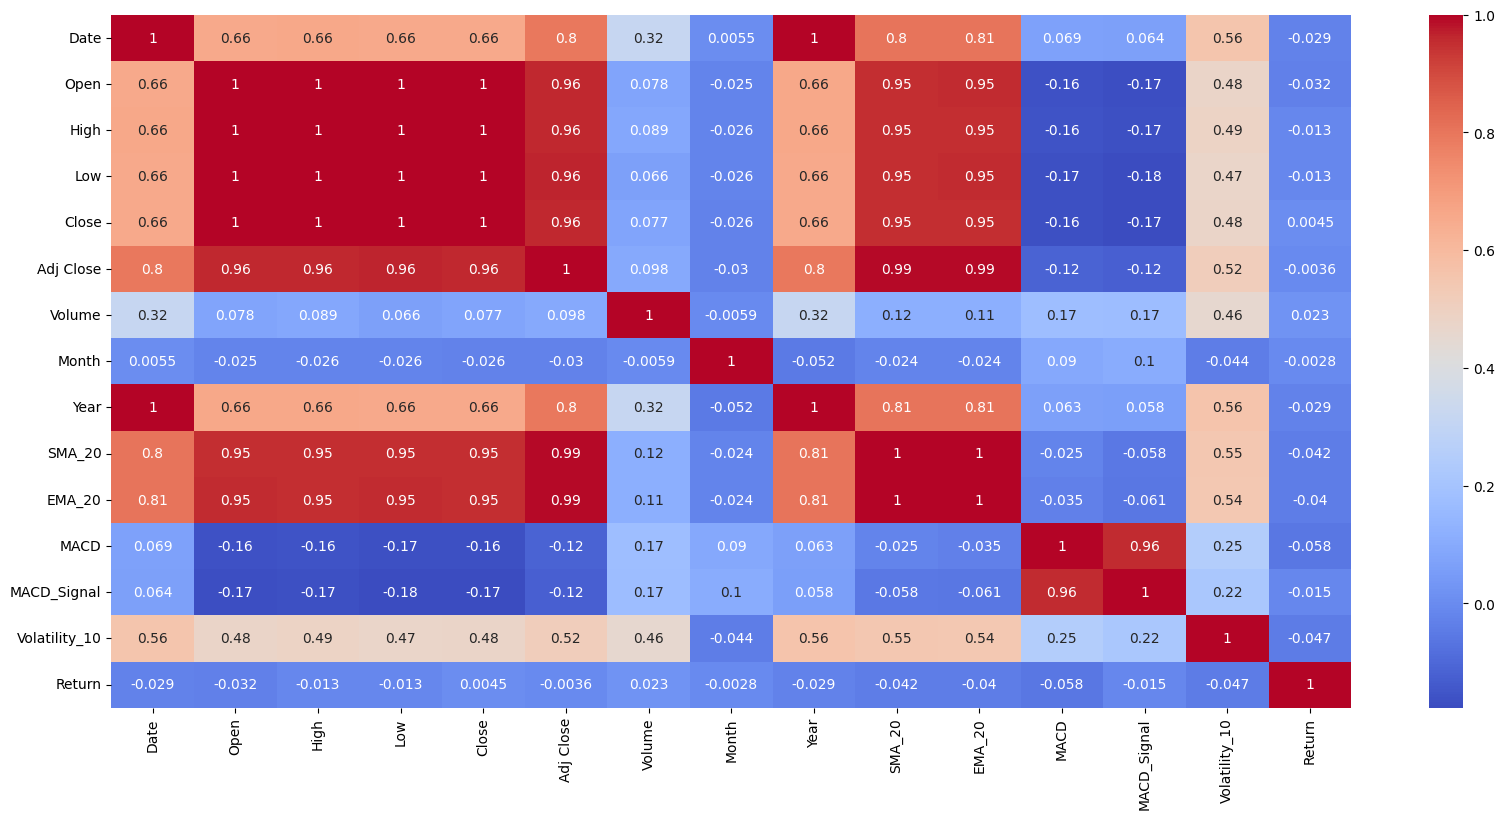

In [12]:
plt.figure(figsize = (20, 9))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

In [15]:
df_reg.drop(['Open', 'High', 'Low', 'SMA_20', 'MACD_Signal'], axis = 1, inplace = True)
df_reg

Date      Close  Adj Close    Volume  Month  Year     EMA_20  \
0    2002-11-21  12.850000   7.091079     91300     11  2002   6.869165   
1    2002-11-22  12.650000   6.980711     55300     11  2002   6.879788   
2    2002-11-25  12.930000   7.135226    111000     11  2002   6.904116   
3    2002-11-26  12.740000   7.030375     59300     11  2002   6.916141   
4    2002-11-27  12.500000   6.897937     94300     11  2002   6.914407   
...         ...        ...        ...       ...    ...   ...        ...   
4364 2020-03-26  71.510002  71.510002  10883600      3  2020  76.415450   
4365 2020-03-27  63.310001  63.310001   9510200      3  2020  75.167312   
4366 2020-03-30  61.099998  61.099998   7156100      3  2020  73.827568   
4367 2020-03-31  60.189999  60.189999   5341600      3  2020  72.528752   
4368 2020-04-01  54.000000  54.000000   6239500      4  2020  70.764109   

           MACD  Volatility_10    Return  
0      0.093175       0.381604  0.035455  
1      0.072991       0.364694 -0.015564  
2      0.044019       0.378693  0.022135  
3      0.029183       0.390969 -0.014695  
4      0.027792       0.327691 -0.018838  
...         ...            ...       ...  
4364  14.197422      11.317923 -0.047295  
4365  13.531361      10.474702 -0.114669  
4366  13.031611      10.418349 -0.034908  
4367  12.564153      10.286681 -0.014894  
4368  12.548519       8.786602 -0.102841  

[4369 rows x 10 columns]

<Axes: >

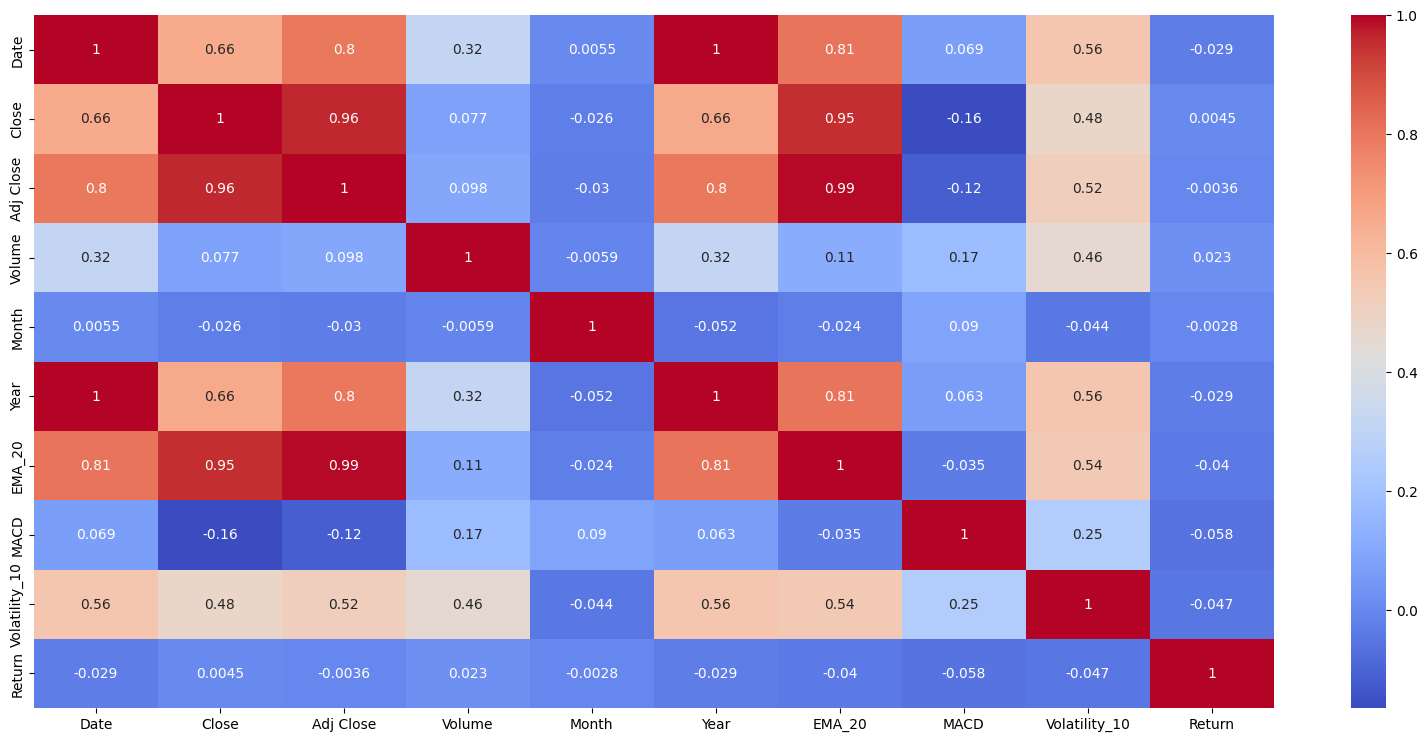

In [16]:
plt.figure(figsize = (20, 9))
sns.heatmap(df_reg.corr(), cmap = 'coolwarm', annot = True)

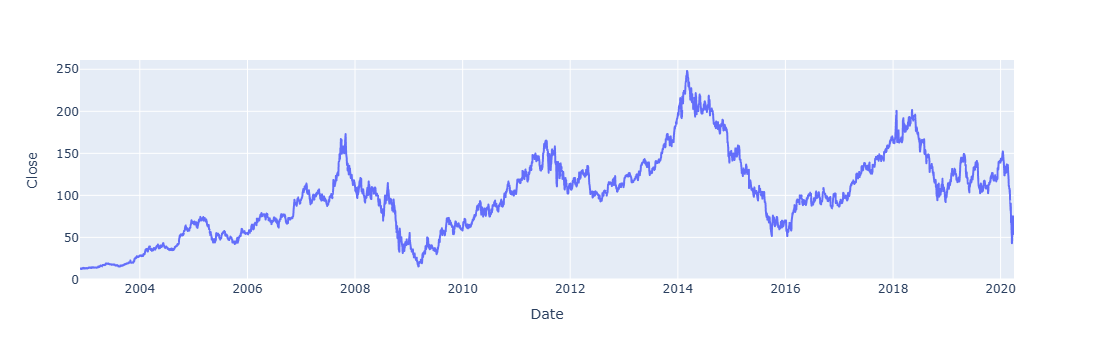

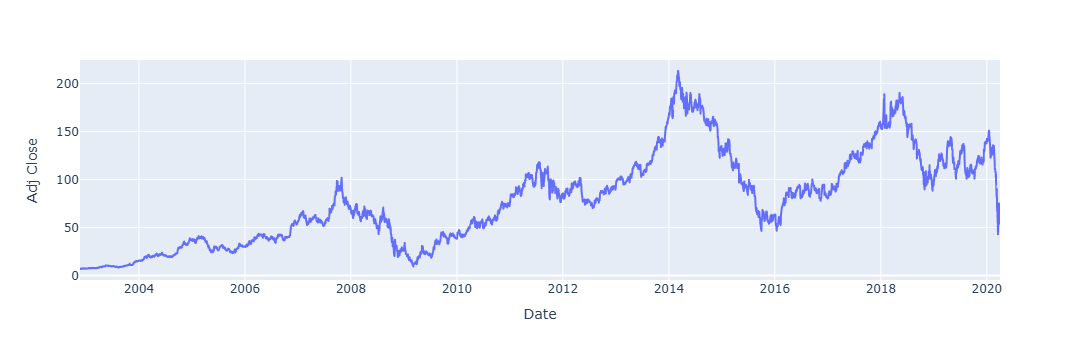

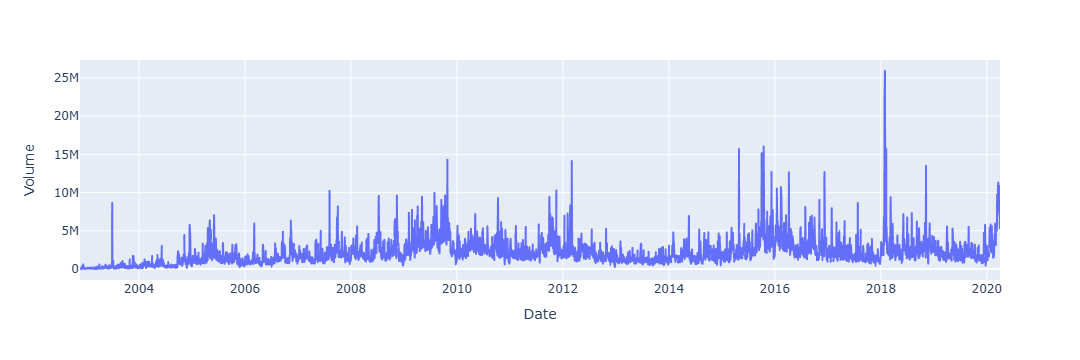

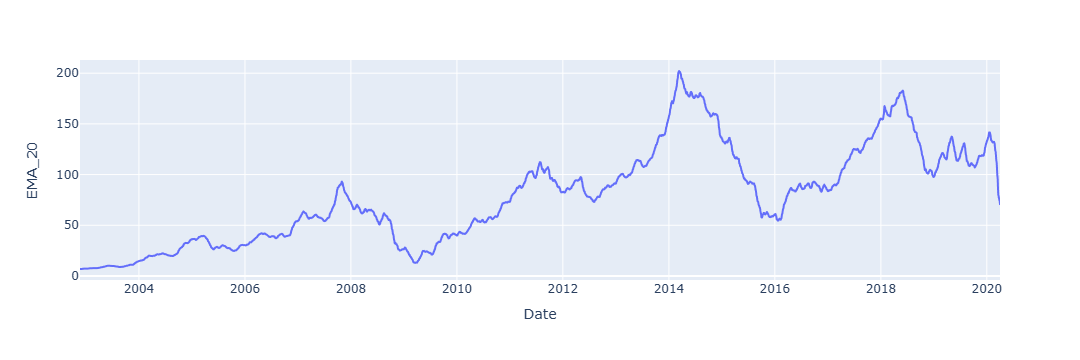

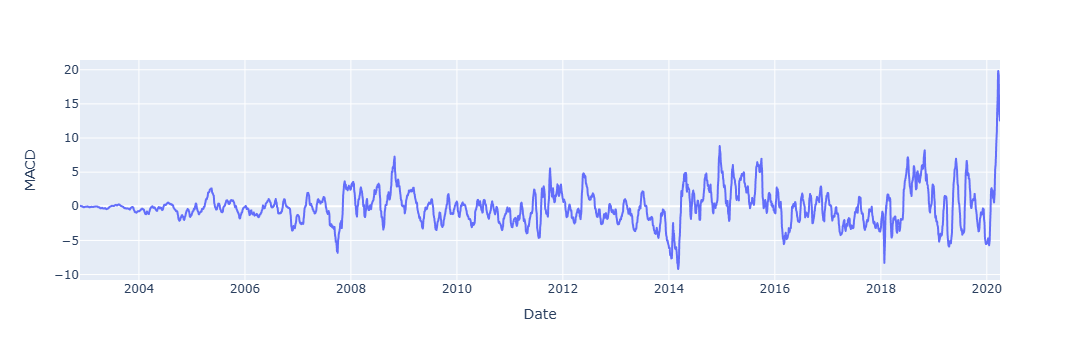

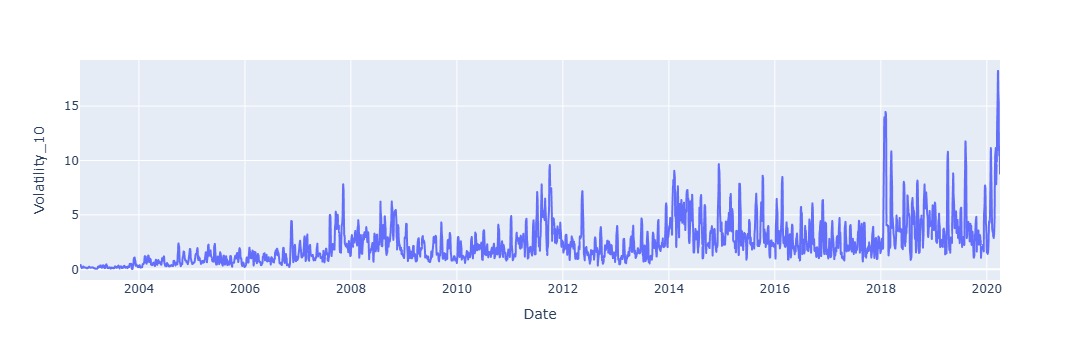

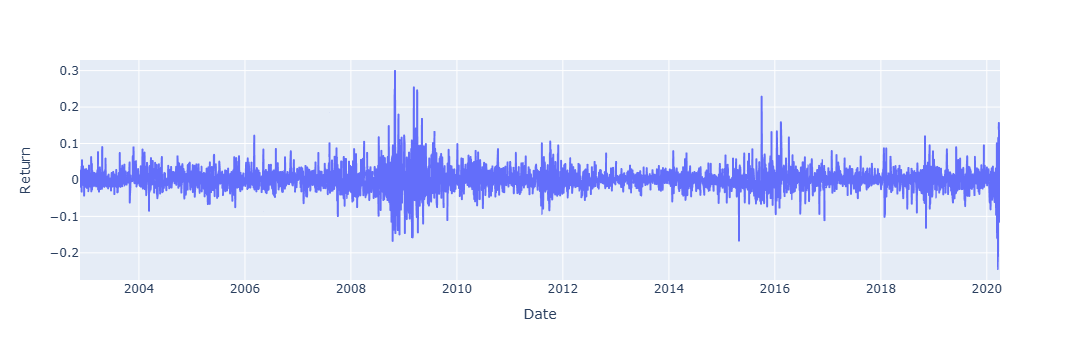

In [17]:
import plotly.express as px
import plotly.graph_objects as go
cols = df_reg.columns
for i in range(len(cols)):
    if cols[i] in ['Date', 'Month', 'Year']:
        continue
    fig = px.line(df_reg, x = 'Date', y = cols[i])
    fig.show()

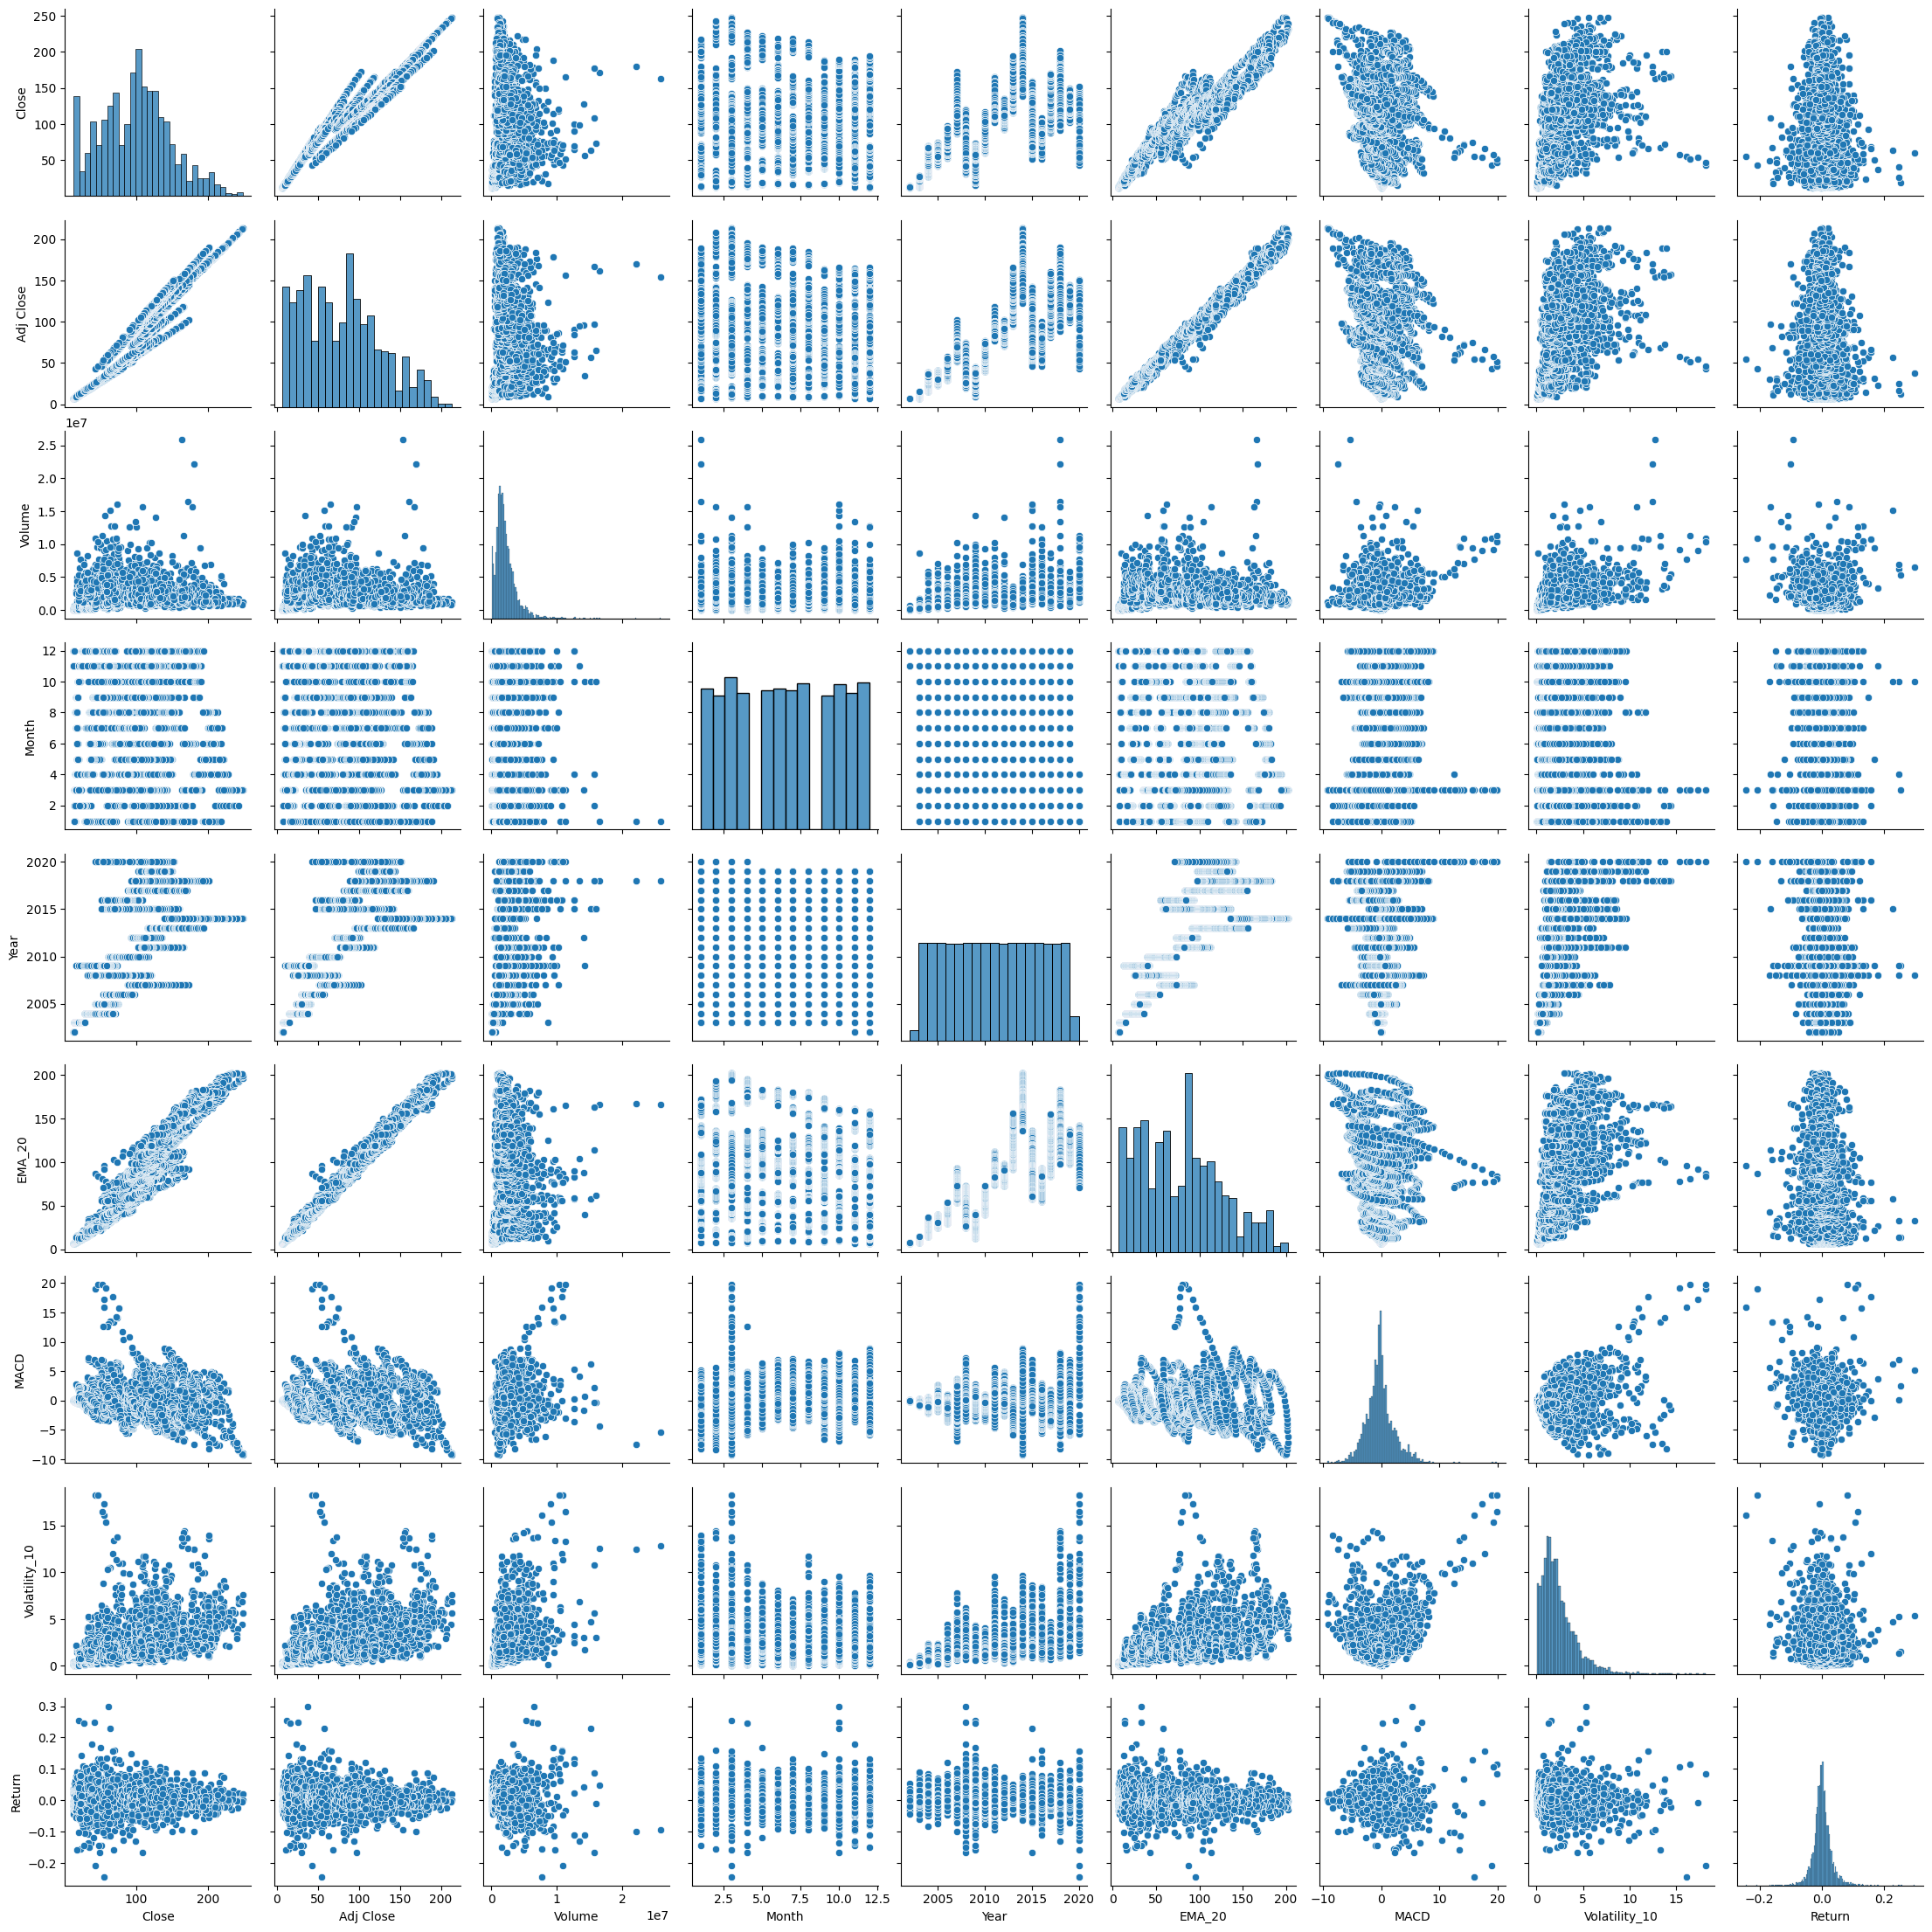

In [18]:
sns.pairplot(df_reg)

In [21]:
data = df_reg.filter(['Close'])
dataset = data.values
n = int(np.ceil( len(dataset) * .95 ))

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(dataset)

In [23]:
train_data = data_scaled[0:int(n), :]
x_train = []
y_train = []

window = 60
for i in range(window, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00203753, 0.00118855, 0.00237711, 0.00157059, 0.00055183,
       0.00191018, 0.00016979, 0.        , 0.00097632, 0.00386281,
       0.00343832, 0.00267425, 0.00267425, 0.00373546, 0.00581543,
       0.00522116, 0.00556075, 0.00471177, 0.0040326 , 0.00161304,
       0.00301384, 0.00458443, 0.00483912, 0.00373546, 0.00267425,
       0.00309874, 0.00314118, 0.00479667, 0.00437219, 0.00390526,
       0.00399015, 0.00275915, 0.00267425, 0.00267425, 0.00407505,
       0.00458443, 0.0055183 , 0.00653706, 0.00471177, 0.00573054,
       0.00802275, 0.0079803 , 0.00691909, 0.00747092, 0.00802275,
       0.00704644, 0.00594278, 0.00585788, 0.00539095, 0.00513626,
       0.00500892, 0.00861703, 0.00670685, 0.00568809, 0.008235  ,
       0.0066644 , 0.0068342 , 0.00831989, 0.00882927, 0.0081501 ])]
[np.float64(0.007173786209055524)]

[array([0.00203753, 0.00118855, 0.00237711, 0.00157059, 0.00055183,
       0.00191018, 0.00016979, 0.        , 0.00097632, 0.00386281,
       0.00343832, 0.0

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

I0000 00:00:1751184263.834197   24183 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2248 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
/root/tf-gpu/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

I0000 00:00:1751184268.359522   24512 cuda_dnn.cc:529] Loaded cuDNN version 90300


4091/4091 ━━━━━━━━━━━━━━━━━━━━ 99s 23ms/step - loss: 0.0021


In [25]:
test_data = data_scaled[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [26]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
rmse

np.float64(5.7011431293224195)

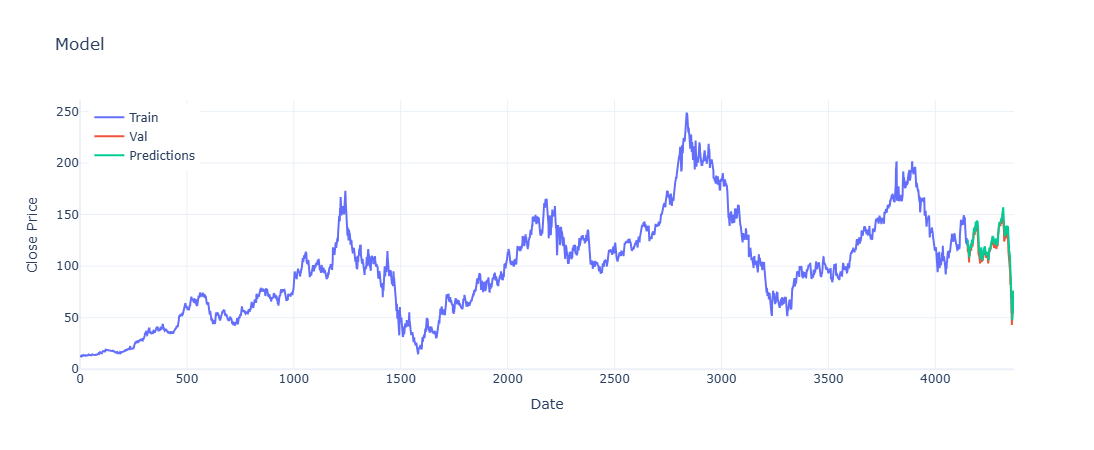

In [31]:
import plotly.graph_objects as go

# assume `train` and `val` have a datetime index or a 'Date' column
# if 'Date' is a column, use x=val['Date'] / x=train['Date'] instead of index

fig = go.Figure()

# Training series
fig.add_trace(go.Scatter(
    x=train.index,
    y=train['Close'],
    mode='lines',
    name='Train'
))

# Validation series (truth)
fig.add_trace(go.Scatter(
    x=val.index,
    y=val['Close'],
    mode='lines',
    name='Val'
))

# Validation predictions
fig.add_trace(go.Scatter(
    x=val.index,
    y=val['Predictions'],
    mode='lines',
    name='Predictions'
))

fig.update_layout(
    title='Model',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend=dict(x=0.01, y=0.99),
    template='plotly_white',
    width=900, height=450
)

fig.show()
